In [37]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [38]:
# Load the data
data = pd.read_csv('merged_data.csv')

In [39]:
data.head()

,TransactionID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [40]:
# drop unecessary columns
data.drop(columns=['TransactionID','TransactionDate','CustomerName','SignupDate','ProductName','Price'],inplace=True)

In [41]:
data.head()

,Quantity,TotalValue,Region,Category
0,1,300.68,Europe,Electronics
1,1,300.68,Asia,Electronics
2,1,300.68,Europe,Electronics
3,2,601.36,South America,Electronics
4,3,902.04,Europe,Electronics


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Region'] = le.fit_transform(data['Region'])
data['Category'] = le.fit_transform(data['Category'])

In [43]:
data.head()

,Quantity,TotalValue,Region,Category
0,1,300.68,1,2
1,1,300.68,0,2
2,1,300.68,1,2
3,2,601.36,3,2
4,3,902.04,1,2


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data)

In [45]:
X.shape

(1000, 4)

### Elbow Curve

**Find the optimal number of clusters**

In [11]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[3999.999999999999, 2825.3449264988985, 2361.3256849682866, 1962.7734034562986, 1743.2464236135306, 1512.7520299586308, 1347.6174379945699, 1197.7556423026288, 1126.1793449742927, 987.1306236657019]


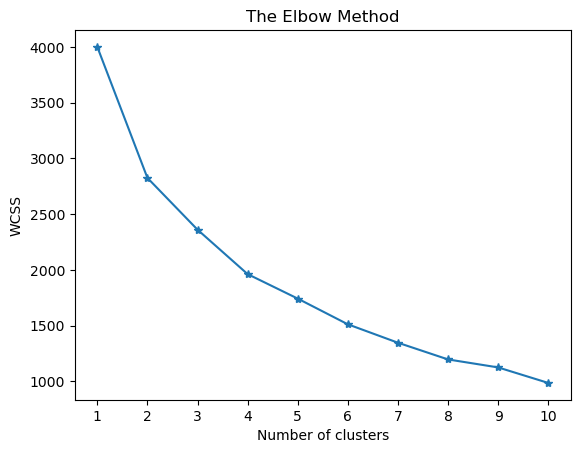

In [12]:
plt.plot(range(1,11),wcss,marker='*')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

1. **K-Means Model**

**Performance Metrics**

1. silhouette_score

In [14]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.27183118106869314, 0.25158212434420896, 0.24936371252342981, 0.23453418205284793, 0.26266704789512146, 0.2624680297531995, 0.25983371833907687, 0.2744134686818353, 0.2602815071165405]


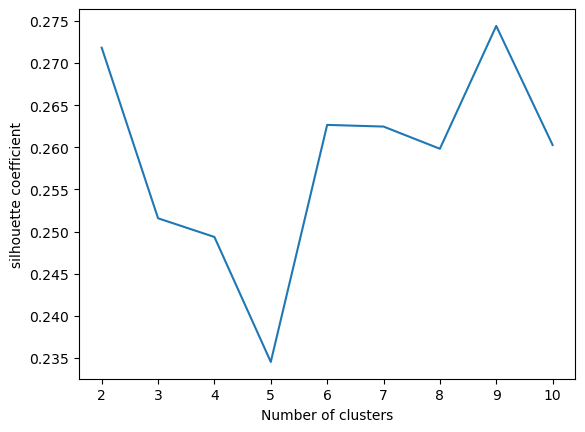

In [15]:
# Plotting silsilhouette_score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

2. davies bouldin score

In [16]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_scores = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    score=davies_bouldin_score(X,kmeans.labels_)
    davies_bouldin_scores.append(score)
print(davies_bouldin_scores)

[1.4844326145057558, 1.418447672221018, 1.3896867879327885, 1.2984569278058076, 1.2534678738566836, 1.1682151925066109, 1.1549451608023578, 1.0973438265307034, 1.1279715743579999]


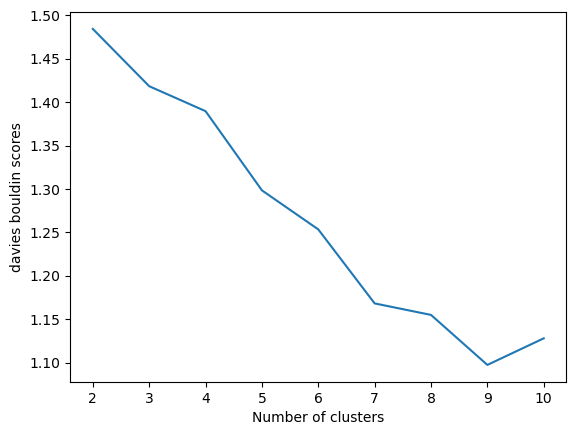

In [17]:
# Plotting davies_bouldin_scores
plt.plot(range(2,11),davies_bouldin_scores)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('davies bouldin scores')
plt.show()

### Hierarchical Culstering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters = k, metric='euclidean',linkage='ward')
    hc.fit(X)
    score=silhouette_score(X,hc.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.2390389965399796, 0.18535327775377192, 0.1907027402962053, 0.20087705307768552, 0.21007875405761778, 0.2169363364965763, 0.22328310913620514, 0.22223351917216708, 0.23349461918222425]


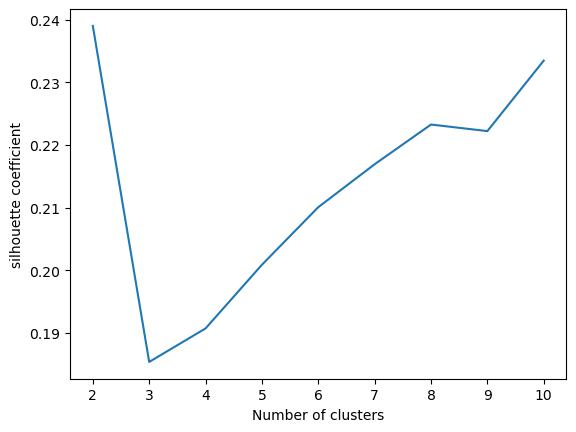

In [29]:
# Plotting silsilhouette_score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
davies_bouldin_scores = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters = k, metric='euclidean',linkage='ward')
    hc.fit(X)
    score=davies_bouldin_score(X,hc.labels_)
    davies_bouldin_scores.append(score)
print(davies_bouldin_scores)

[1.6199421677068833, 1.7379267430663665, 1.5697008802865717, 1.4145120080941027, 1.2716675272196447, 1.2233319515714436, 1.2389118227790972, 1.3328556521906147, 1.2708999072258844]


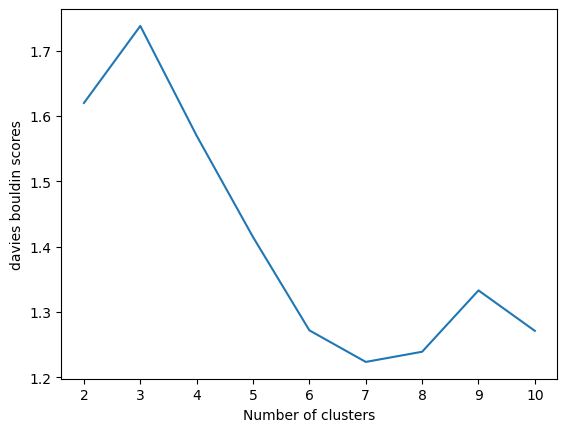

In [31]:
# Plotting davies_bouldin_scores
plt.plot(range(2,11),davies_bouldin_scores)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('davies bouldin scores')
plt.show()